##### Copyright 2023 Phillip Truppelli

In [1]:
# The purpose of this script is to showcase Grover's search algorithm applied to quantum natural language processing.
# This will provide a baseline framework for query answering on a quantum computer.
# You may obtain the source code and documentation here:
# 
# https://github.com/truppelli
# 
# This code is covered under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

Vocabulary:
Word('Phillip', grammar.pregroup.Ty(rigid.Ob('n')))
Word('designs', grammar.pregroup.Ty(rigid.Ob('n', z=1), rigid.Ob('s'), rigid.Ob('n', z=-1)))
Word('efficient', grammar.pregroup.Ty(rigid.Ob('n'), rigid.Ob('n', z=-1)))
Word('quantum', grammar.pregroup.Ty(rigid.Ob('n'), rigid.Ob('n', z=-1)))
Word('algorithms', grammar.pregroup.Ty(rigid.Ob('n')))


Diagram for 'Phillip designs efficient quantum algorithms':


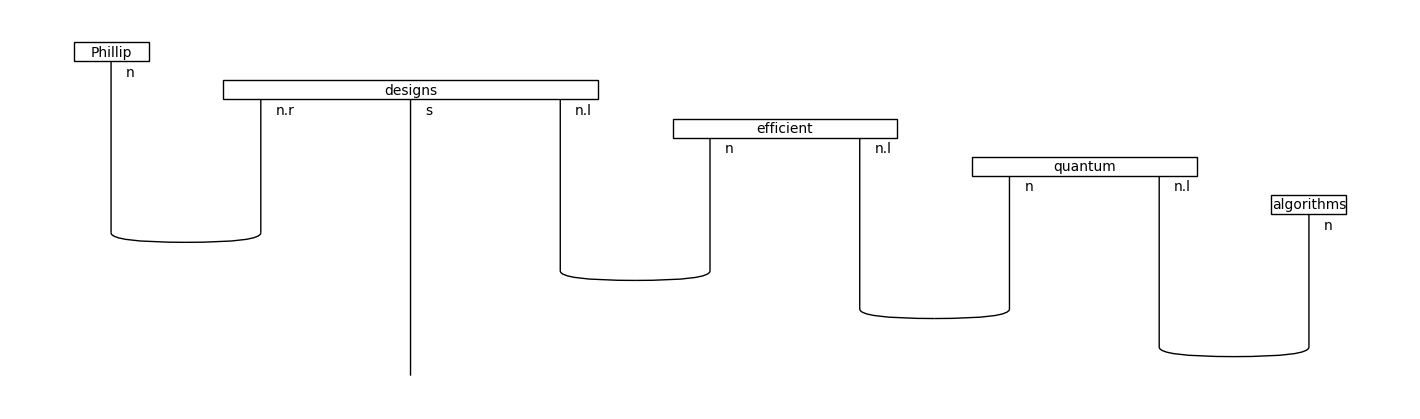

In [76]:
# DisCoCat (Categorical Compositional Distributional) is a mathematical foundation that can be used to represent grammatical structure.
# The following example showcases a simple sentence
from discopy.grammar.pregroup import Ty, Id, Word, Cup, Diagram

n, s = Ty('n'), Ty('s')

Phillip = Word("Phillip", n)
designs = Word("designs", n.r @ s @ n.l)
efficient = Word("efficient", n @ n.l)
quantum = Word("quantum", n @ n.l)
algorithms = Word("algorithms", n)

print("Vocabulary:\n{}".format('\n'.join(map(repr, [Phillip, designs, efficient, quantum, algorithms]))))

grammar = Cup(n, n.r) @ Id(s) @ Cup(n.l, n) @ Cup(n.l, n) @ Cup(n.l, n)

sentence = Phillip @ designs @ efficient @ quantum @ algorithms >> grammar
print("\n")
print("Diagram for 'Phillip designs efficient quantum algorithms':")
sentence.draw(figsize=(14, 4))

In [78]:
# Now we want to test out the parsing capabilities of DisCoPy
parsing = {"{} {} {} {} {}.".format(subj, verb, adj1, adj2, obj): subj @ verb @ adj1 @ adj2 @ obj >> grammar
            for subj in [Phillip] for verb in [designs] for adj1 in [efficient] for adj2 in [quantum] for obj in [algorithms]}
diagram = parsing['Phillip designs efficient quantum algorithms.']
sentences = list(parsing.keys())
print("Grammatical sentences:\n{}".format('\n'.join(sentences)))

Grammatical sentences:
Phillip designs efficient quantum algorithms.


In [71]:
from discopy.quantum import Ket, H, Rx, CX, sqrt

def verb_ansatz(phase):
    return Ket(0, 0) >> H @ sqrt(2) @ Rx(phase) >> CX

print(verb_ansatz(0).eval())

Tensor[complex]([1.+0.j, 0.+0.j, 0.+0.j, 1.+0.j], dom=Dim(1), cod=Dim(2, 2))


In [ ]:
.25 * (verb_ansatz(0) >> verb_ansatz(0).dagger()).measure()

In [ ]:
from discopy import CircuitFunctor, qubit

ob = {s: 0, n: 1}
ar = lambda params: {
    Phillip: Ket(0), algorithms: Ket(1),
    designs: verb_ansatz(params['designs'])}
    

F = lambda params: CircuitFunctor(ob, ar(params))

params0 = {'loves': 0.5}

print("Circuit for 'Alice loves Bob':")
F(params0)(parsing['Alice loves Bob.']).draw(
    aspect='auto', draw_type_labels=False, figsize=(5, 5))

In [83]:
from discopy.cat import Category
from discopy.tensor import Tensor
from discopy import tensor

F = tensor.Functor(
    ob={n: 2, s: 1},
    ar={Phillip: [0, 1], designs: [0, 1, 0, 0], algorithms: [1, 0]},
    dom=Category(Ty, Diagram))

print(F(Phillip @ designs @ algorithms)) # need to add adjectives now
print(F(grammar))

assert F(Phillip @ designs @ algorithms >> grammar).array == 1

Tensor[int]([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dom=Dim(1), cod=Dim(2, 2, 2, 2))
Tensor[int]([1, 0, 0, ..., 0, 0, 1], dom=Dim(2, 2, 2, 2, 2, 2, 2, 2), cod=Dim(1))


AxiomError: n @ n.r @ s @ n.l @ algorithms does not compose with Cup(n, n.r) @ s @ n.l @ n @ n.l @ n @ n.l @ n: n @ n.r @ s @ n.l @ n != n @ n.r @ s @ n.l @ n @ n.l @ n @ n.l @ n.

In [3]:
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq
    import cirq

    print("installed cirq.")

In [6]:
# Pick a qubit.
qubit = cirq.GridQubit(0, 0)

# Create a circuit that applies a square root of NOT gate, then measures the qubit.
circuit = cirq.Circuit(cirq.X(qubit) ** 0.5, cirq.measure(qubit, key='m'))
print("Circuit:")
print(circuit)

# Simulate the circuit several times.
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=20)
print("Results:")
print(result)

Circuit:
(0, 0): ───X^0.5───M('m')───
Results:
m=01001110100010010000
